In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def collateData(csvFilePath):
    csv_files = glob.glob(os.path.join(csvFilePath, "*.tsv"))
    df_list = (pd.read_csv(file,sep='\t') for file in csv_files)
    big_df = pd.concat(df_list, ignore_index=True)
    return big_df

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("drive/My Drive/tweet-data/")

Mounted at /content/drive


In [ ]:
#read all training data
train_big_df = collateData('allcsv/train/')

In [ ]:
#read all testing data
test_big_df = collateData('allcsv/test/')

In [ ]:
disasters = ["caution_and_advice",
             "displaced_people_and_evacuations",
             "infrastructure_and_utility_damage",
             "injured_or_dead_people"]
for i in range(len(train_big_df)):
    if(train_big_df.loc[i,'class_label'] in disasters):
        train_big_df.loc[i,'labels'] = 1
    else:
        train_big_df.loc[i,'labels'] = 0

for i in range(len(test_big_df)):
    if(test_big_df.loc[i,'class_label'] in disasters):
        test_big_df.loc[i,'labels'] = 1
    else:
        test_big_df.loc[i,'labels'] = 0

In [ ]:
train_big_df.rename(columns={'tweet_text': 'text'}, inplace=True)
test_big_df.rename(columns={'tweet_text': 'text'}, inplace=True)

train_big_df.drop('class_label', axis=1, inplace=True)
test_big_df.drop('class_label', axis=1, inplace=True)

0.0    20089
1.0    10292
Name: labels, dtype: int64


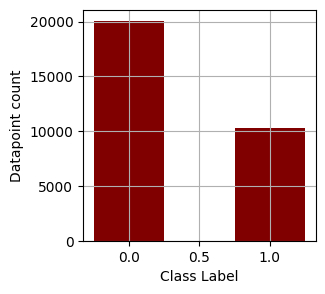

In [ ]:
label_counts = train_big_df['labels'].value_counts()
print(label_counts)
plt.figure(figsize=(3,3))
plt.bar(label_counts.index, label_counts,color ='maroon',
        width = 0.5)
plt.xlabel("Class Label")
plt.ylabel("Datapoint count")
plt.grid()
plt.show()

In [ ]:
#Twitter being a micro-blogging site, users usually tend to use a lot of abbreviated texts
def deabbreviate(text):
    text = text.upper()
    text = re.sub(r'bAFAIKb', ' As Far As I Know ',text)
    text = re.sub(r'bAFKb', ' From Keyboard ',text)
    text = re.sub(r'bASAPb', ' As Soon As Possible ',text)
    text = re.sub(r'bATKb', ' At The Keyboard ',text)
    text = re.sub(r'bA3b', ' Anytime, Anywhere, Anyplace ',text)
    text = re.sub(r'bBAKb', ' Back At Keyboard ',text)
    text = re.sub(r'bBBLb', ' Be Back Later ',text)
    text = re.sub(r'bBBSb', ' Be Back Soon ',text)
    text = re.sub(r'bBFNb', ' Bye For Now ',text)
    text = re.sub(r'bBRBb', ' Be Right Back ',text)
    text = re.sub(r'bBRTb', ' Be Right There ',text)
    text = re.sub(r'bBTWb', ' By The Way ',text)
    text = re.sub(r'bB4b', ' Before ',text)
    text = re.sub(r'bB4Nb', ' Bye For Now ',text)
    text = re.sub(r'bCUb', ' See You ',text)
    text = re.sub(r'bCUL8Rb', ' See You Later ',text)
    text = re.sub(r'bCYAb', ' See You ',text)
    text = re.sub(r'bFAQb', ' Frequently Asked Questions ',text)
    text = re.sub(r'bFYIb', ' For Your Information ',text)
    text = re.sub(r'bGNb', ' Good Night ',text)
    text = re.sub(r'bGR8b', ' Great ',text)
    text = re.sub(r'bICb', ' I See ',text)
    text = re.sub(r'bLOLb', ' Laughing Out Loud ',text)
    text = re.sub(r'bL8Rb', ' Later ',text)
    text = re.sub(r'bM8b', ' Mate ',text)
    text = re.sub(r'bTHXb', ' Thank You ',text)
    text = re.sub(r'bTTFNb', ' BYE ',text)
    text = re.sub(r'bTTFNb', ' BYE ',text)
    text = re.sub(r'bUb', ' You ',text)
    text = re.sub(r'bU2b', ' You TOO ',text)
    text = re.sub(r'bWTFb', ' What The Heck ',text)
    text = re.sub(r'bW8b', ' Wait ',text)
    text = re.sub(r'bFAVb', ' Favourite ',text)
    text = re.sub(r'bHWYb'," highway ",text)
    text = re.sub(r'bPPLb'," people ",text)
    text = re.sub(r'bGVb'," give ",text)
    text = re.sub(r'bWANNAb'," want to ",text)
    text = text.lower()
    return text

In [ ]:
#function filters out only the ASCII characters and removes any other non-ASCII or symbolic characters.
def return_ascii(text):
    ret_str = ""
    for char in list(text):
        if char.isascii():
            ret_str += char
    return ret_str

In [ ]:
def preprocess(text):

    punctuations = '!"#$%&()\'*+,-./:;?@[]^_`{|}~'

    #1.Removing AM and PM

    text = re.sub(r'b[AP]{1}Mb'," ",text)

    #2.Lowercasing

    text = text.lower()

    #3.removing mentions

    text =re.sub(r'@[^ ]+',' ',text)

    #4.removing urls

    text = re.sub(r'https*://t.co/w+',' ',text)

    text = re.sub(r'https*://[^ ]+',' ',text)

    #5.De-abbreviating

    text = deabbreviate(text)

    #6.Removing punctuations

    for p in punctuations:

        text = text.replace(p,"   ")

    #6.Remove non-ASCII
    text = return_ascii(text)

    return text

In [ ]:
train_big_df['text'] = train_big_df['text'].apply(preprocess)
test_big_df['text'] = test_big_df['text'].apply(preprocess)

In [ ]:
import nltk
nltk.download('wordnet')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
train_big_df['text'] = train_big_df['text'].apply(lemmatize_words)
test_big_df['text'] = test_big_df['text'].apply(lemmatize_words)

In [ ]:
train_big_df.head()

,tweet_id,text,labels
0,735891446960623616,rt how come to the assistance of fort mcmurray...,0.0
1,731202020296818688,red cross distribute 30m to fort mcmurray wild...,1.0
2,733665357236342784,interest insights on the shift communications ...,0.0
3,731963038429929472,rt oil sand producers help workers affect by f...,0.0
4,728674838034944001,ottawa to match red cross donations for fort m...,0.0


Max tweet size 56


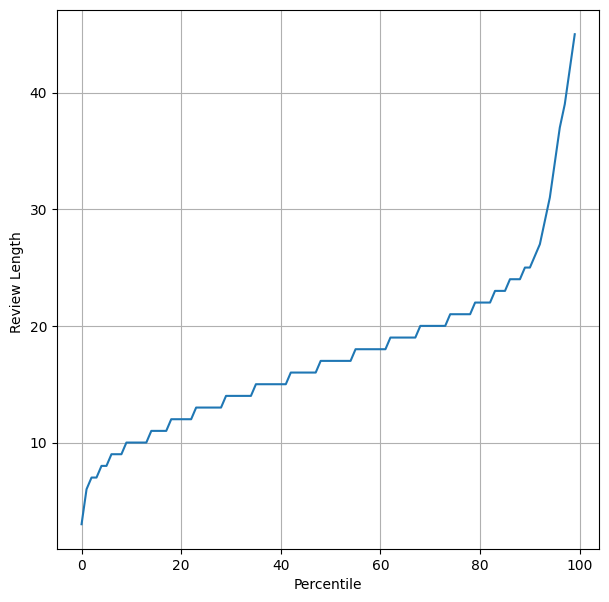

In [ ]:
review_len = np.array([len(x.split()) for x in train_big_df['text'].values])
review_len = np.sort(review_len)
print("Max tweet size "+ str(max(review_len)))
review_len_percnt = np.percentile(review_len,range(100))
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(range(100),review_len_percnt)
ax.set_xlabel("Percentile")
ax.set_ylabel("Review Length ")
plt.grid()
plt.show()

In [ ]:
negative_sentences = ""
positive_sentences = ""

for i in range(len(train_big_df)):
    if(train_big_df.loc[i,'labels'] == 1):
        negative_sentences = negative_sentences + " "+train_big_df.loc[i,'text']
    else:
        positive_sentences = positive_sentences + " "+train_big_df.loc[i,'text']

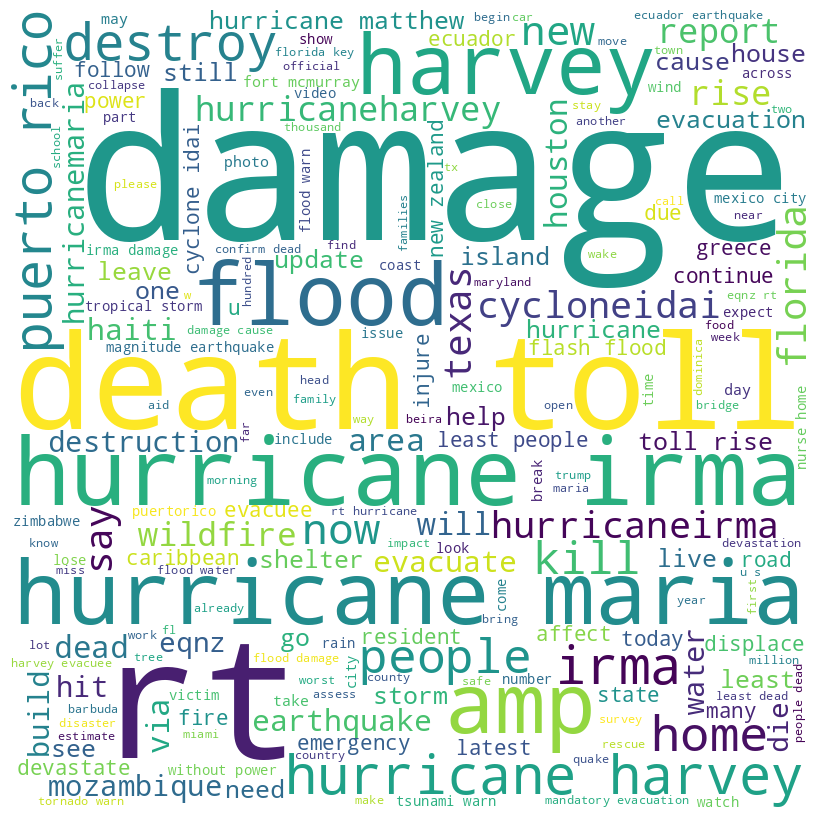

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_sentences)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

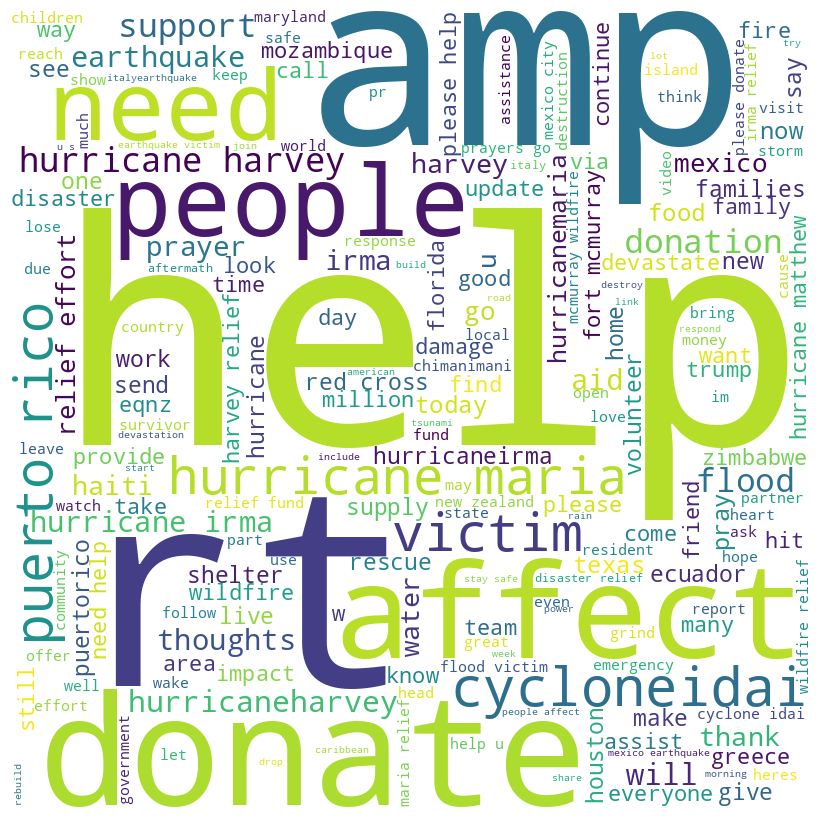

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(positive_sentences)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
train_big_df.to_hdf('train-data.h5', key='train', mode='w')
test_big_df.to_hdf('test-data.h5', key='test', mode='w')